In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1- Loading the Dataset

In [2]:
df_surtidores = pd.read_csv("precios-en-surtidor-resolucin-3142016.csv")
df_surtidores['indice_tiempo']= pd.to_datetime(df_surtidores['indice_tiempo']).dt.to_period('M')

df_surtidores= df_surtidores.drop(['empresa','direccion','cuit','idempresa','producto','tipohorario','longitud','geojson','latitud','empresabandera'],axis=1)
df_surtidores.head()


,indice_tiempo,localidad,provincia,region,idproducto,idtipohorario,precio,fecha_vigencia,idempresabandera
0,2024-04,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,19,2,982.0,2024-04-02 14:00:00,28
1,2024-04,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,19,3,982.0,2024-04-02 14:00:00,28
2,2024-04,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,21,2,1190.0,2024-04-02 14:00:00,28
3,2024-04,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,21,3,1190.0,2024-04-02 14:00:00,28
4,2024-04,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,2,329.9,2024-04-02 14:01:00,28


In [3]:
df_tipo_de_cambio = pd.read_csv("tipos-de-cambio-historicos.csv")
df_tipo_de_cambio['indice_tiempo'] = pd.to_datetime(df_tipo_de_cambio['indice_tiempo']).dt.to_period('M')
df_tipo_de_cambio['indice_tiempo'] = df_tipo_de_cambio['indice_tiempo']
df_tipo_de_cambio.tail()

,indice_tiempo,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500
19805,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19806,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19807,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19808,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167
19809,2024-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,858.0001,857.4167


In [4]:
df_filtro_fecha = df_tipo_de_cambio[df_tipo_de_cambio['dolar_estadounidense']>0]
df_filtro_fecha['resta_est_3500']=abs(df_filtro_fecha['dolar_estadounidense']-df_filtro_fecha['dolar_referencia_com_3500'])
df_tipo_de_cambio_dolar = df_filtro_fecha[['indice_tiempo','dolar_estadounidense']]
df_tipo_de_cambio_dolar= df_tipo_de_cambio_dolar.groupby('indice_tiempo',as_index=False).mean()
df_tipo_de_cambio_dolar

/tmp/ipykernel_488907/1464770618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro_fecha['resta_est_3500']=abs(df_filtro_fecha['dolar_estadounidense']-df_filtro_fecha['dolar_referencia_com_3500'])


,indice_tiempo,dolar_estadounidense
0,1992-01,0.991030
1,1992-02,0.991190
2,1992-03,0.992023
3,1992-04,0.991043
4,1992-05,0.991000
...,...,...
382,2023-11,353.453383
383,2023-12,636.416203
384,2024-01,817.875903
385,2024-02,834.093203


In [5]:
df_surtidores_dolar = pd.merge(df_tipo_de_cambio_dolar,df_surtidores,how='inner')
#df_surtidores_dolar.sort_values('dolar_estadounidense',ascending=False)
df_surtidores_dolar.sort_index()
df_surtidores_dolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   indice_tiempo         5923 non-null   period[M]
 1   dolar_estadounidense  5923 non-null   float64  
 2   localidad             5923 non-null   object   
 3   provincia             5923 non-null   object   
 4   region                4734 non-null   object   
 5   idproducto            5923 non-null   int64    
 6   idtipohorario         5923 non-null   int64    
 7   precio                5923 non-null   float64  
 8   fecha_vigencia        5923 non-null   object   
 9   idempresabandera      5923 non-null   int64    
dtypes: float64(2), int64(3), object(4), period[M](1)
memory usage: 462.9+ KB


In [6]:
df_surtidores_dolar.head()

,indice_tiempo,dolar_estadounidense,localidad,provincia,region,idproducto,idtipohorario,precio,fecha_vigencia,idempresabandera
0,2016-06,14.150933,CUTRAL CO,NEUQUEN,PATAGONIA,6,2,9.90,2016-06-30 00:00:00,1
1,2016-06,14.150933,CUTRAL CO,NEUQUEN,PATAGONIA,6,3,9.90,2016-06-30 00:00:00,1
2,2016-06,14.150933,ROJAS,BUENOS AIRES,PAMPEANA,6,2,11.94,2016-06-01 11:58:00,2
3,2016-06,14.150933,ROJAS,BUENOS AIRES,PAMPEANA,6,3,11.94,2016-06-01 11:58:00,2
4,2016-08,14.835613,BANDA DEL RIO SALI,TUCUMAN,CUYO,6,2,10.68,2016-08-01 09:42:00,2


## 2 - Data Preparation

In [48]:
df_test =df_surtidores_dolar.groupby(['provincia'])[['indice_tiempo','dolar_estadounidense','precio']].mean()

df_test

,indice_tiempo,dolar_estadounidense,precio
provincia,,,
BUENOS AIRES,2022-08,498.178541,443.142417
CAPITAL FEDERAL,2022-11,519.606328,475.162610
CATAMARCA,2023-03,636.874716,317.911429
CHACO,2022-07,428.907799,514.978393
CHUBUT,2022-01,340.409757,357.123415
CORDOBA,2022-06,465.924053,491.281498
CORRIENTES,2022-11,557.424019,687.689574
ENTRE RIOS,2022-03,474.639215,542.068267
FORMOSA,2021-01,176.489386,212.725484


/tmp/ipykernel_488907/3200372894.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()


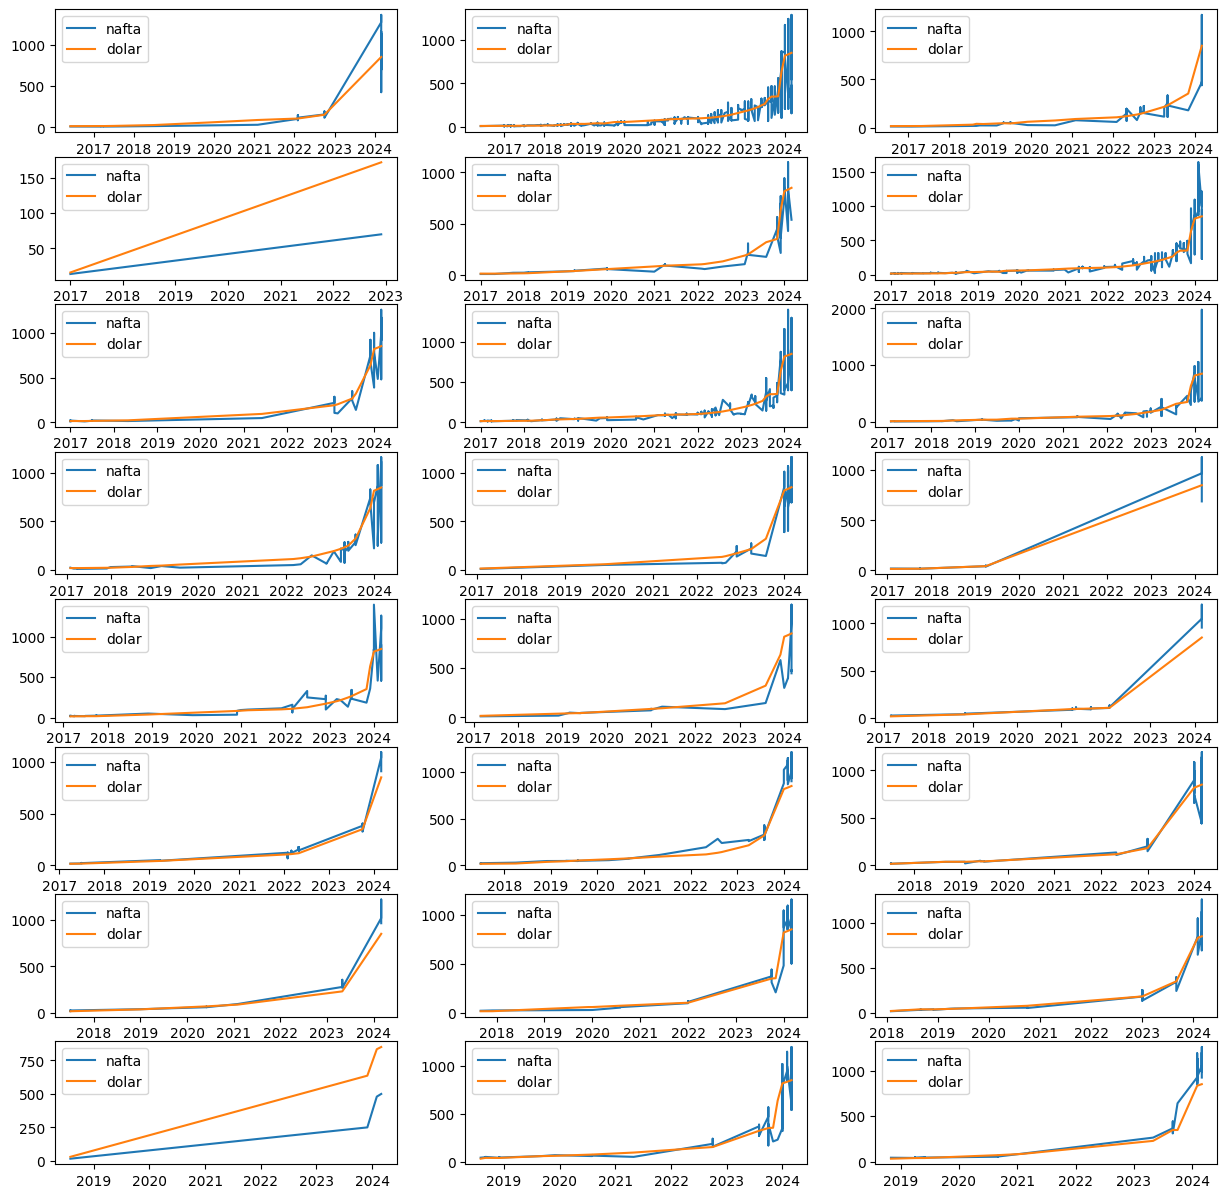

In [57]:
nrows= len(df_surtidores_dolar['provincia'].unique())//3
ncols= 3
col=0
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,15))




for index, provincia in enumerate(df_surtidores_dolar['provincia'].unique()):
    df = df_surtidores_dolar[df_surtidores_dolar['provincia']==provincia]
    row = index//3
    col = col
    df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()
    axes[row][col].plot(df['indice_tiempo'],df['precio'],label='nafta')
    axes[row][col].plot(df['indice_tiempo'],df['dolar_estadounidense'],label='dolar')
    axes[row][col].legend() 
    col= col+1
    if (col==3):
        col=0



In [52]:
df_test_bandera =df_surtidores_dolar.groupby(['idempresabandera'])[['indice_tiempo','dolar_estadounidense','precio']].mean()

df_test_bandera

,indice_tiempo,dolar_estadounidense,precio
idempresabandera,,,
-1,2017-03,15.523484,20.600000
1,2021-08,317.883783,329.433633
2,2021-08,374.992651,242.004925
4,2023-07,686.730662,647.983407
6,2022-08,349.331957,347.918558
8,2022-01,349.454587,375.533939
26,2023-02,567.849226,609.249144
28,2023-09,675.859416,687.625303
29,2023-11,725.865386,793.154417


Most of the columns seem to have complete data. We will see which we are going to use as feature to predict the total

/tmp/ipykernel_488907/3826762144.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()


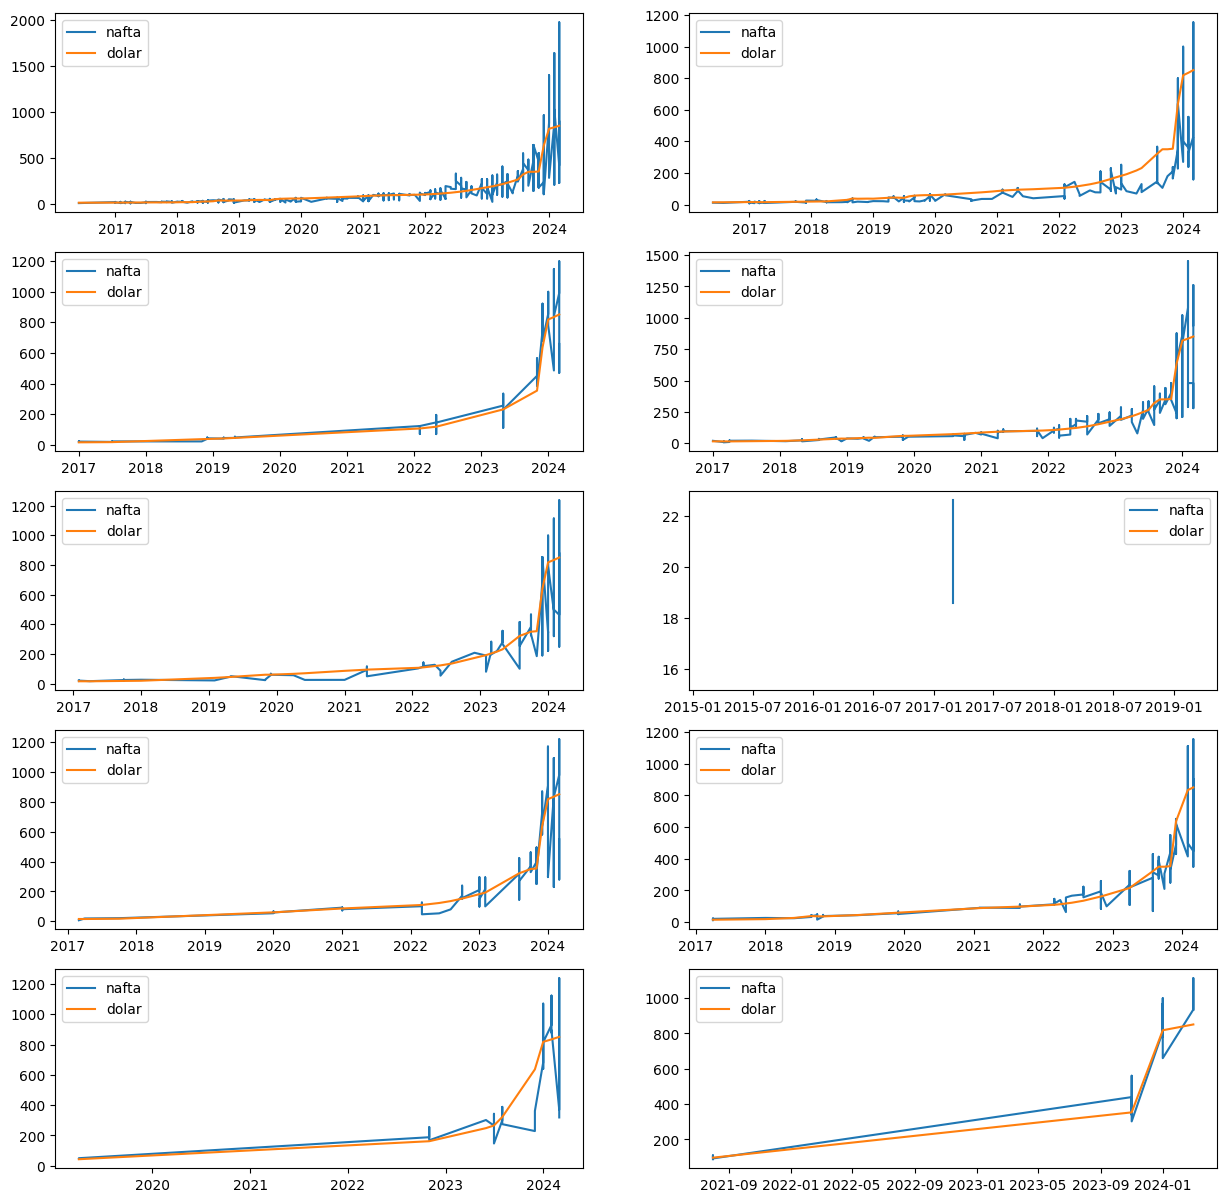

In [58]:
nrows= len(df_surtidores_dolar['idempresabandera'].unique())//2
ncols= 2
col=0
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,15))




for index, provincia in enumerate(df_surtidores_dolar['idempresabandera'].unique()):
    df = df_surtidores_dolar[df_surtidores_dolar['idempresabandera']==provincia]
    row = index//2
    col = col
    df['indice_tiempo'] = df['indice_tiempo'].dt.to_timestamp()
    axes[row][col].plot(df['indice_tiempo'],df['precio'],label='nafta')
    axes[row][col].plot(df['indice_tiempo'],df['dolar_estadounidense'],label='dolar')
    axes[row][col].legend() 
    col= col+1
    if (col==2):
        col=0



### Train and Test split

In [10]:
from sklearn.model_selection import train_test_split
train_data = df.copy()
X = df.drop(['total'],axis=1)
y = df['total']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

KeyError: "['total'] not found in axis"

### Waching the correlation between variables

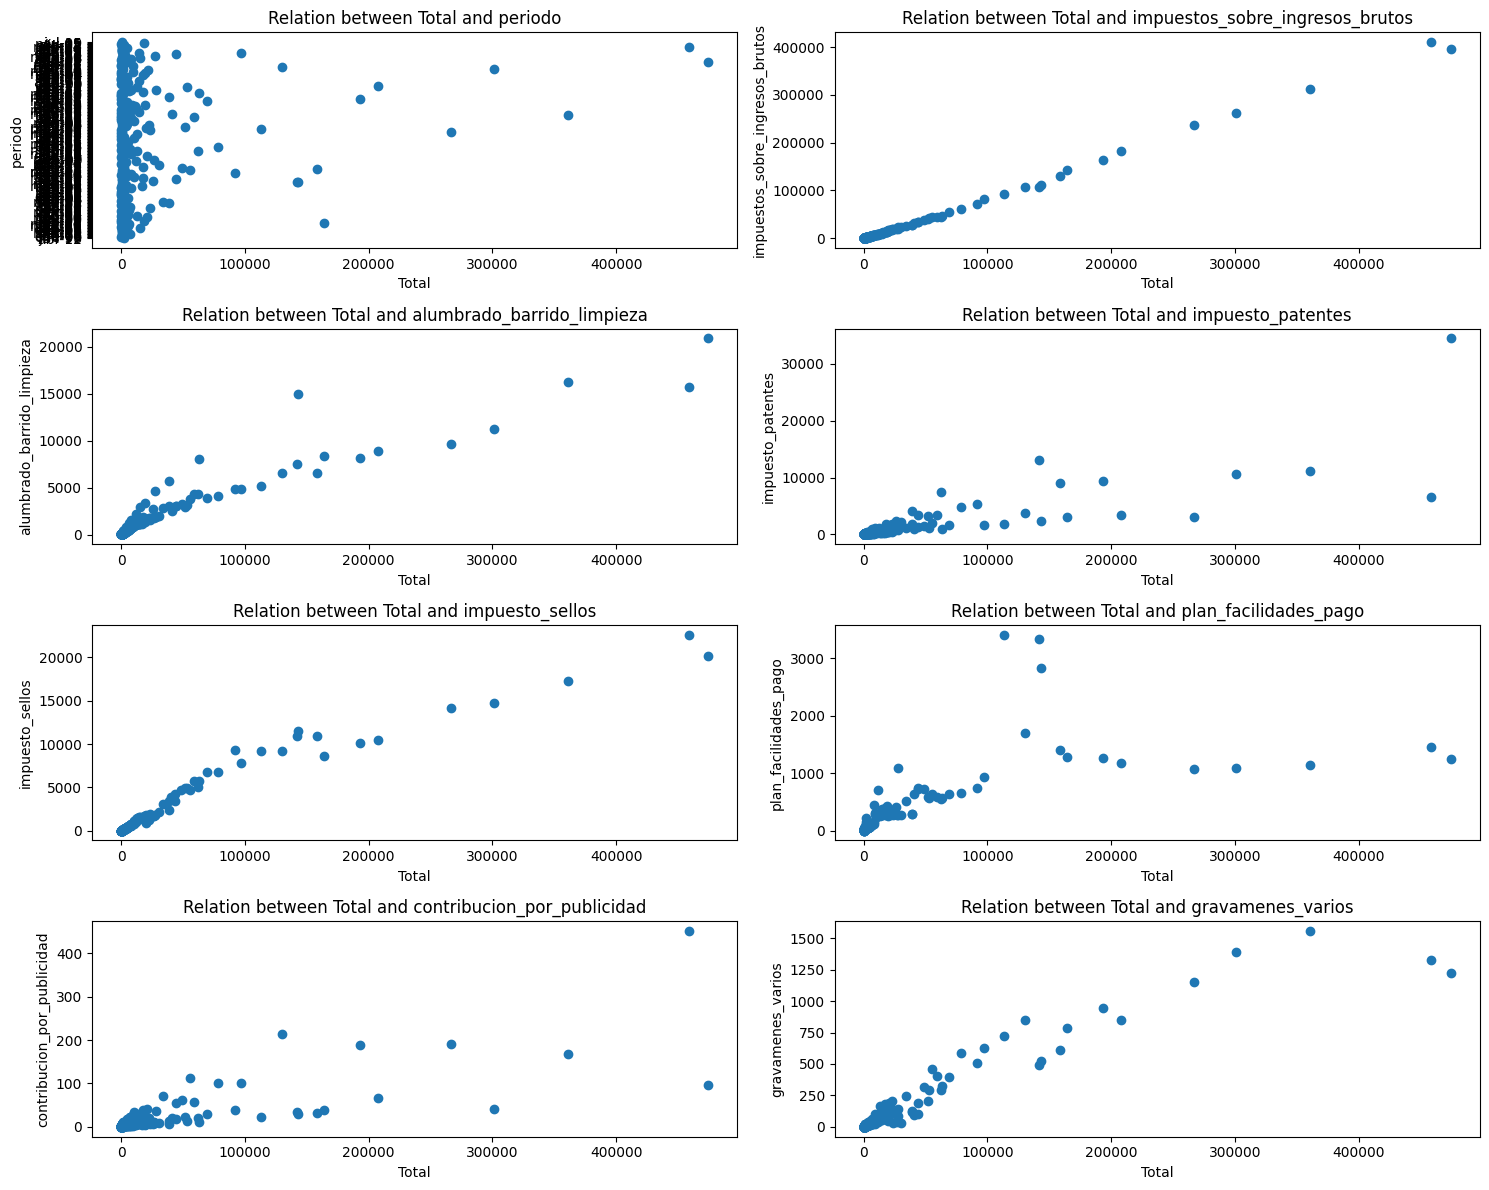

In [ ]:
X_train
nrows= len(X_train.columns)//2
ncolumns = 2

fig,ax = plt.subplots(nrows=nrows,ncols=ncolumns,figsize=(15,3*nrows))

for index, column in enumerate(X_train.columns):
        row = index//2
        col = index%2
        ax[row][col].scatter(y_train,X_train[column])
        ax[row][col].set_title(f"Relation between Total and {column}")
        ax[row][col].set_xlabel("Total")
        ax[row][col].set_ylabel(column)

plt.tight_layout()



Let's normalize data, 

In [ ]:
X_train_feature = X_train['impuestos_sobre_ingresos_brutos']
X_train_feature =pd.DataFrame(X_train_feature) #Transforming the serie in DataFrame

X_test_feature = X_test['impuestos_sobre_ingresos_brutos']
X_test_feature = pd.DataFrame(X_test_feature)

## 3 - Training the model
In this case we are using a simple Linear Regression to train our model

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_feature,y_train)

LinearRegression()

### Making one prediction about our model

In [ ]:
index_value = 100
value = X_train_feature['impuestos_sobre_ingresos_brutos'][index_value]
predicted_value = lin_reg_model.predict([[value]])
actual_value = y_train[index_value]


print(f"Valor buscado: {value}")
print(f"Predicted value: {predicted_value}")
print(f"Actual value: {actual_value}")

Valor buscado: 296.4
Predicted value: [1335.36037505]
Actual value: 413.0


/home/brunojaime/Documents/Machine learning/mlvenv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 4 - Evaluating the model

## Cost function of our model on the training set
We are going to use mean_squared_error to measure the performance of our model

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = lin_reg_model.predict(X_train_feature)
lin_reg_mse_train = mean_squared_error(y_train,y_train_pred)
lin_reg_mse_train

7473386.863180375

## Cost function of our model on the testing set

In [ ]:
from sklearn.metrics import mean_squared_error

y_test_pred = lin_reg_model.predict(X_test_feature)
lin_reg_mse_test = mean_squared_error(y_test,y_test_pred)
lin_reg_mse_test

7576446.077708077

## Plotting the results

Text(12.097222222222216, 0.5, '$ Impuestos sobre ingresos brutos')

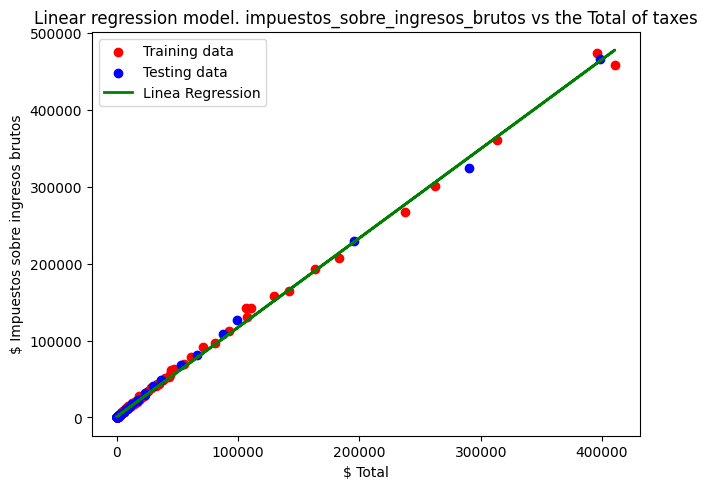

In [ ]:
plt.scatter(X_train_feature,y_train,color="red",label="Training data")
plt.scatter(X_test_feature,y_test,color="blue",label="Testing data")
plt.plot(X_train_feature,y_train_pred,color="green",linewidth=2,label="Linea Regression")
plt.title("Linear regression model. impuestos_sobre_ingresos_brutos vs the Total of taxes")
plt.legend()
plt.tight_layout()
plt.xlabel("$ Total")
plt.ylabel("$ Impuestos sobre ingresos brutos")